In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# A Machine Learning Approach for Classifying Sinopia's RDF

Jeremy Nelson

9 July 2020


## Setup
To run the RDF Classify code in the Colab environment, we will first need to clone the https://github.com/ld4p/rdf-classify repository.

In [2]:
! git clone https://github.com/LD4P/rdf-classify.git

Cloning into 'rdf-classify'...
remote: Enumerating objects: 196, done.
remote: Counting objects: 100% (196/196), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 196 (delta 101), reused 156 (delta 72), pack-reused 0
Receiving objects: 100% (196/196), 6.71 MiB | 5.44 MiB/s, done.
Resolving deltas: 100% (101/101), done.


Now we will download the latest Sinopia stage and production RDF exports in zip format.

In [3]:
# Downloaded from https://stage.sinopia.io/exports
! wget -O sinopia-stage.zip https://sinopia-exports-staging.s3-us-west-2.amazonaws.com/sinopia_export_all_2020-07-05T00:02:02.510Z.zip

--2020-07-08 19:39:03--  https://sinopia-exports-staging.s3-us-west-2.amazonaws.com/sinopia_export_all_2020-07-05T00:02:02.510Z.zip
Resolving sinopia-exports-staging.s3-us-west-2.amazonaws.com (sinopia-exports-staging.s3-us-west-2.amazonaws.com)... 52.218.248.225
Connecting to sinopia-exports-staging.s3-us-west-2.amazonaws.com (sinopia-exports-staging.s3-us-west-2.amazonaws.com)|52.218.248.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9885661 (9.4M) [application/zip]
Saving to: ‘sinopia-stage.zip’

sinopia-stage.zip   100%[===================>]   9.43M  7.02MB/s    in 1.3s    

2020-07-08 19:39:05 (7.02 MB/s) - ‘sinopia-stage.zip’ saved [9885661/9885661]



In [4]:
# Downloaded from https://sinopia.io/exports
! wget -O sinopia-prod.zip https://sinopia-exports-production.s3-us-west-2.amazonaws.com/sinopia_export_all_2020-07-07T19:04:22.771Z.zip

--2020-07-08 19:39:10--  https://sinopia-exports-production.s3-us-west-2.amazonaws.com/sinopia_export_all_2020-07-07T19:04:22.771Z.zip
Resolving sinopia-exports-production.s3-us-west-2.amazonaws.com (sinopia-exports-production.s3-us-west-2.amazonaws.com)... 52.218.208.241
Connecting to sinopia-exports-production.s3-us-west-2.amazonaws.com (sinopia-exports-production.s3-us-west-2.amazonaws.com)|52.218.208.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5693153 (5.4M) [application/zip]
Saving to: ‘sinopia-prod.zip’

sinopia-prod.zip    100%[===================>]   5.43M  4.80MB/s    in 1.1s    

2020-07-08 19:39:12 (4.80 MB/s) - ‘sinopia-prod.zip’ saved [5693153/5693153]



Next, we will install the [rdflib](https://rdflib.readthedocs.io/en/stable/) and a [rdflib-jsonld](https://github.com/RDFLib/rdflib-jsonld) packages needed by the **RDF Classify** modules we will be using in this demo.

In [5]:
! pip install rdflib rdflib-jsonld

     |████████████████████████████████| 235kB 2.7MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
  Created wheel for rdflib-jsonld: filename=rdflib_jsonld-0.5.0-py2.py3-none-any.whl size=15348 sha256=fe682a63b44d50ffb4af4fd8787751d346cbc822d78a9b24cd7178e4c120e969
  Stored in directory: /root/.cache/pip/wheels/8d/e4/7f/9ebcb3e400c694e645c3adba40ef3e9bda78384ac3b9b0d13d
Successfully built rdflib-jsonld


In [2]:
! pip install rdflib-jsonld==0.4.0

Finally, we  import the [fastai.tabular](https://docs.fast.ai/tabular.html) module and we add the Python helper modules from the `rdf-classify` repository

In [8]:
from fastai.tabular import *
import sys
sys.path.append("/content/rdf-classify/src")
import data_loader
import data_prep

In [9]:
help(data_loader)

Help on module data_loader:

NAME
    data_loader - Extracts serialized RDF and loads into one or more graphs

FUNCTIONS
    create_tensor(graph:rdflib.graph.Graph, group:str) -> List
    
    from_zipfile(zip_filepath:str) -> List
        Takes a zip filepath, extracts Sinopia RDF files, loading each JSON-LD
        into a rdflib.ConjunctionGraph, returns a list of these graphs.
        
        @param zip_filepath -- Path to zip files
    
    predicate_columns(resource_template_group_url:str) -> List
    
    process_predicates(subject_key:str, predicates:List, resource_template:Union[rdflib.term.URIRef, NoneType], group:str) -> dict
    
    to_dataframe(graphs:List[dict], rt_url:str) -> pandas.core.frame.DataFrame
        Function takes a list of RDF graphs and a Trellis URL pointing the resource
        templates location
        
        @param graphs -- List of dictionaries with graph and group keys
        @param rt_url -- Trellis URL to environment's resource templates

DATA


In [9]:
help(data_prep)

Help on module data_prep:

NAME
    data_prep

DESCRIPTION
    Data preparation helper module for converting a RDF Panda DataFrame to
    FastAI TabularList

FUNCTIONS
    databunch(df:pandas.core.frame.DataFrame, dependent_var:str='resource_template') -> fastai.basic_data.DataBunch

FILE
    /content/rdf-classify/src/data_prep.py




## Sinopia RDF Panda DataFrames
The `data_loader` module provides a `from_zipfile` function that iterates through an export zip file, extracts the RDF (and displays an error message if it cannot parse the RDF), and returns a list of RDF graphs of each resource in the Sinopia enviroment along with what group that graph is associated with in Sinopia.

In [14]:
production = data_loader.from_zipfile('/content/sinopia-prod.zip')

PluginException: ignored

In [13]:
stage = data_loader.from_zipfile('/content/sinopia-stage.zip')

PluginException: ignored

In [12]:
print(f"Production size: {len(production)} Stage size: {len(stage)}")

NameError: ignored

Here is an example of one of the RDF graphs in production:

In [ ]:
print(production[34]['graph'].serialize(format='turtle').decode())

NameError: ignored

Now that we have lists of RDF graphs, we use the `data_loader.to_dataframe` helper function along with an URL to the environment's stored resource templates to construct a Pandas data-frame.

In [ ]:
production_df = data_loader.to_dataframe(production, 'https://trellis.sinopia.io/repository/ld4p')
stage_df = data_loader.to_dataframe(stage, 'https://trellis.stage.sinopia.io/repository/ld4p')

Starting convert 2774 to dataframe at 2020-07-08 02:10:22.254947
.0..........100..........200..........300..........400..........500..........600..........700..........800..........900..........1000..........1100..........1200..........1300..........1400..........1500..........1600..........1700..........1800..........1900..........2000..........2100..........2200..........2300..........2400..........2500..........2600..........2700.......
    Finished at 2020-07-08 02:15:13.785642 time 4.85 minutes for dataframe,
    size 2776
Starting convert 4338 to dataframe at 2020-07-08 02:15:14.354121
Failed https://trellis.stage.sinopia.io/repository/ld4p/UNAM:RT:BF2:RetenciÃ³n status 404
.0..........100..........200..........300..........400..........500..........600..........700..........800..........900..........1000..........1100..........1200..........1300..........1400..........1500..........1600..........1700..........1800..........1900..........2000..........2100..........2200..........

Each dataframe has a different shape based on the number of propertyTemplates contained in the resource templates for each environment.

In [ ]:
production_df.fillna(0)

,subject,resource_template,group,http://id.loc.gov/ontologies/bibframe/mainTitle,http://id.loc.gov/ontologies/bibframe/subtitle,http://library.yale.edu/ld4p/nonfiling,http://id.loc.gov/ontologies/bibframe/partNumber,http://id.loc.gov/ontologies/bibframe/partName,http://id.loc.gov/ontologies/bibframe/note,http://id.loc.gov/ontologies/bibframe/source,http://schema.org/abstract,http://schema.org/additionalType,http://schema.org/alternateName,http://schema.org/description,http://schema.org/disambiguatingDescription,http://schema.org/identifier,http://schema.org/image,http://schema.org/mainEntityOfPage,http://schema.org/name,http://schema.org/potentialAction,http://schema.org/sameAs,http://schema.org/url,http://id.loc.gov/ontologies/bibframe/Place,http://id.loc.gov/ontologies/bibframe/contribution,https://w3id.org/arm/core/ontology/0.1/atLocation,http://www.europeana.eu/schemas/edm/occurredAt,http://www.ontologydesignpatterns.org/cp/owl/sequence.owl#precedes,http://www.ontologydesignpatterns.org/cp/owl/sequence.owl#follows,http://id.loc.gov/ontologies/bflc/relationship,http://id.loc.gov/ontologies/bibframe/identifiedBy,http://id.loc.gov/ontologies/bibframe/sublocation,http://id.loc.gov/ontologies/bibframe/usageAndAccessPolicy,http://id.loc.gov/ontologies/bibframe/title,https://w3id.org/arm/custodial_history/ontology/0.1/hasCustodialHistory,http://id.loc.gov/ontologies/bibframe/custodialHistory,https://w3id.org/arm/core/ontology/0.1/markedBy,https://w3id.org/arm/core/ontology/0.1/hasPhysicalCondition,http://id.loc.gov/ontologies/bibframe/partOf,http://id.loc.gov/ontologies/bibframe/genreForm,https://w3id.org/arm/core/ontology/0.1/hasCitation,...,http://www.loc.gov/standards/mods/v3/mods-3-6#recordInfoNote,http://www.loc.gov/standards/mods/v3/mods-3-6#languageOfCataloging,http://www.loc.gov/standards/mods/v3/mods-3-6#descriptionStandard,http://rdaregistry.info/Elements/e/P20029,http://rdaregistry.info/Elements/e/P20296,http://rdaregistry.info/Elements/e/P20293,http://rdaregistry.info/Elements/e/P20024,http://rdaregistry.info/Elements/e/P20276,http://rdaregistry.info/Elements/e/P20139,http://rdaregistry.info/Elements/e/P20083,http://rdaregistry.info/Elements/e/P20249,http://rdaregistry.info/Elements/e/P20244,http://rdaregistry.info/Elements/e/P20252,http://rdaregistry.info/Elements/e/P20160,http://www.w3.org/2000/01/rdf-schema#comment,http://creativecommons.org/ns#legalCode,http://creativecommons.org/ns#permits,http://creativecommons.org/ns#prohibits,http://creativecommons.org/ns#requires,http://creativecommons.org/ns#jurisdiction,http://creativecommons.org/ns#deprecatedOn,http://rdaregistry.info/Elements/m/P30245,http://rdaregistry.info/Elements/m/P30200,http://rdaregistry.info/Elements/m/P30163,http://rdaregistry.info/Elements/m/P30104,http://rdaregistry.info/Elements/m/P30123,http://rdaregistry.info/Elements/m/P30006,http://rdaregistry.info/Elements/m/P30202,http://rdaregistry.info/Elements/m/P30068,http://rdaregistry.info/Elements/m/P30037,http://vivoweb.org/ontology/core#rank,http://id.loc.gov/ontologies/bibframe/PlaybackCharacteristic,https://library.yale.edu/terms/manufacturerLabel,http://id.loc.gov/ontologies/bflc/CaptureStorage,http://www.w3.org/1999/02/22-rdf-syntax-ns#_1,http://www.w3.org/1999/02/22-rdf-syntax-ns#_2,http://www.w3.org/1999/02/22-rdf-syntax-ns#_3,http://www.w3.org/1999/02/22-rdf-syntax-ns#_4,http://www.w3.org/1999/02/22-rdf-syntax-ns#_5,http://www.w3.org/1999/02/22-rdf-syntax-ns#_6
0,https://trellis.sinopia.io/repository/yale/8a8...,Yale:RT:BF2:Series:Work:CtY,yale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,https://trellis.sinopia.io/repository/yale/d54...,Yale:RT:BF2:Monograph:Item-CtY,yale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
stage_df.fillna(0.)

,subject,resource_template,group,http://id.loc.gov/ontologies/bibframe/agent,http://id.loc.gov/ontologies/bibframe/role,http://www.w3.org/2000/01/rdf-schema#label,http://id.loc.gov/ontologies/bibframe/contribution,http://id.loc.gov/ontologies/bibframe/title,http://id.loc.gov/ontologies/bibframe/genreForm,http://id.loc.gov/ontologies/bibframe/originDate,http://id.loc.gov/ontologies/bibframe/originPlace,http://id.loc.gov/ontologies/bibframe/geographicCoverage,http://id.loc.gov/ontologies/bibframe/temporalCoverage,http://id.loc.gov/ontologies/bibframe/note,http://id.loc.gov/ontologies/bibframe/tableOfContents,http://id.loc.gov/ontologies/bibframe/summary,http://id.loc.gov/ontologies/bibframe/subject,http://id.loc.gov/ontologies/bibframe/classification,http://id.loc.gov/ontologies/bibframe/content,http://id.loc.gov/ontologies/bibframe/language,http://id.loc.gov/ontologies/bibframe/illustrativeContent,http://id.loc.gov/ontologies/bibframe/colorContent,http://id.loc.gov/ontologies/bflc/relationship,http://id.loc.gov/ontologies/bibframe/hasExpression,http://id.loc.gov/ontologies/bibframe/hasInstance,http://www.loc.gov/mads/rdf/v1#Address,http://www.loc.gov/mads/rdf/v1#email,http://www.loc.gov/mads/rdf/v1#AffiliationAddress,http://www.w3.org/2002/07/owl#sameAs,http://id.loc.gov/ontologies/bibframe/hasSeries,http://id.loc.gov/ontologies/bibframe/intendedAudience,http://id.loc.gov/ontologies/bibframe/dissertation,http://id.loc.gov/ontologies/bibframe/notation,http://id.loc.gov/ontologies/bibframe/supplementaryContent,http://id.loc.gov/ontologies/bibframe/adminMetadata,http://purl.org/dc/terms/hasPart,http://www.w3.org/1999/02/22-rdf-syntax-ns#value,http://id.loc.gov/ontologies/bibframe/source,http://id.loc.gov/ontologies/bibframe/GenreForm,http://id.loc.gov/ontologies/bibframe/DescriptionConventions,...,http://rdaregistry.info/Elements/w/P10245,http://rdaregistry.info/Elements/w/P10244,http://rdaregistry.info/Elements/w/P10242,http://rdaregistry.info/Elements/w/P10240,http://www.test1.com,http://performedmusicontology.org/ontology/IndividualMediumOfPerformance,http://id.loc.gov/ontologies/bibframe/Local,http://performedmusicontology.org/ontology/hasNumberOfHands,http://performedmusicontology.org/ontology/hasTemp,http://www.loc.gov/mads/rdf/v1#ConferenceName,http://vivoweb.org/ontology/core#rank,http://id.loc.gov/ontologies/bibframe/CollectiveTitle,http://www.w3.org/ns/oa#hasTargetSuperWork,http://www.w3.org/ns/oa#hasTargetWork,http://www.w3.org/ns/oa#hasTargetInstance,http://www.w3.org/ns/oa#hasTargetItem,http://rdaregistry.info/Elements/m/P30304,http://id.loc.gov/ontologies/bibframe/Meeting,http://id.loc.gov/ontologies/bibframe/eventContent,http://id.loc.gov/ontologies/bibframe/SoundContent,http://performedmusicontology.org/ontology/performanceOf,http://id.loc.gov/ontologies/bibframe/PlaybackCharacteristic,http://id.loc.gov/ontologies/bibframe/GrooveCharacteristic,http://bibframe.org/ontologies/agent,http://bibframe.org/ontologies/Contribution,http://rdaregistry.info/Elements/e/P20293,http://rdaregistry.info/Elements/e/P20281,http://rdaregistry.info/Elements/e/P20127,http://rdaregistry.info/Elements/e/P20139,http://rdaregistry.info/Elements/e/P20159,http://rdaregistry.info/Elements/e/P20081,http://rdaregistry.info/Elements/e/P20165,http://rdaregistry.info/Elements/e/P20082,http://rdaregistry.info/Elements/e/P20083,http://rdaregistry.info/Elements/e/P20249,http://rdaregistry.info/Elements/e/P20244,http://rdaregistry.info/Elements/e/P20103,http://rdaregistry.info/Elements/e/P20252,http://rdaregistry.info/Elements/e/P20250,http://rdaregistry.info/Elements/e/P20248
0,https://trellis.stage.sinopia.io/repository/wa...,lc:RT:bflc:Agents:PrimaryContribution,washington,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

## FastAI TabularList DataBunch
Before we can start using the FastAI machine learning classes, we first need to do some data preparation to convert our dataframes to a FastAI DataBunch subclass, TabularList. This is available in our helper `data_bunch.databunch` function. 

In [ ]:
production_bunch = data_prep.databunch(production_df)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
WAU:RT:RDA:Manifestation:eGraphic, sinopia:resourceTemplate:bf2:WorkVariantTitle, ld4p:RT:bf2:WorkTitle, UCSD:RT:BF2:Monograph:Instance_OpenAccess:Un-nested, WAU:RT:RDA:experimentalProfile:Work...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [ ]:
production_df = production_df.fillna(0.)
stage_df = stage_df.fillna(0.)

## TabularLearner
With a TabularList, we can use the TabularLearner class to create a learner object that we can train and then use the learner to predict what an incoming RDF graph best matches to a Sinopia resource template

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


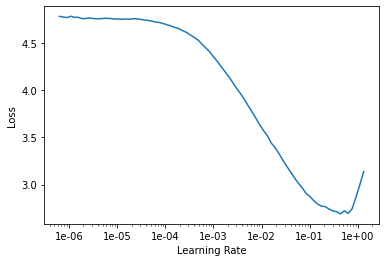

In [ ]:
prod_learner = tabular_learner(production_bunch, layers=[300,100], metrics=accuracy)
prod_learner.lr_find()
prod_learner.recorder.plot()

In [ ]:
prod_learner.fit(3, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,1.146062,1.241015,0.673861,00:01
1,0.670110,1.757845,0.657074,00:01
2,0.398150,3.554070,0.697842,00:01


/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
sinopia:resourceTemplate:bf2:Item:Use, harvard:test2:resourceTemplate:bf2:Item:ImmAcqSource, UNAM:RT:BF2:Agentes:Jurisdiccion, sinopia:resourceTemplate:bf2:WorkVariantTitle, UAL:resourceTemplate:bf2:Monograph:Item:Un-Nested...
  if getattr(ds, 'warn', False): warn(ds.warn)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


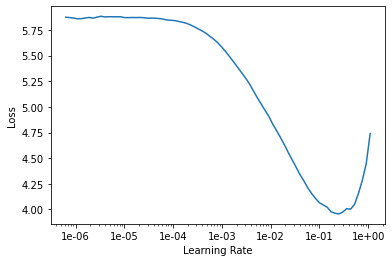

In [ ]:
stage_bunch = data_prep.databunch(stage_df)
stage_learner = tabular_learner(stage_bunch, layers=[300,100], metrics=accuracy)
stage_learner.lr_find()
stage_learner.recorder.plot()

In [ ]:
stage_learner.fit(3, 1e-10)

epoch,train_loss,valid_loss,accuracy,time
0,0.401288,246.021667,0.268640,00:02
1,0.407919,155.166107,0.276316,00:03
2,0.411705,192.106247,0.277412,00:03


In [ ]:
all_df = production_df + stage_df

In [ ]:
all_databunch = data_prep.databunch(all_df)

AssertionError: ignored